# Price Paid

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Background

The Price Paid data is published by the HM Land Registry. It contains information of all residential property sales in England and Wales that are sold for value and are lodged with us for registration. See [HM Land Registry Price Paid Data webpage](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads#full-publication-update-history).

Information is published monthly with a monthly lag e.g. December 2024 data was published on 29 January 2025. The data is updated on the 20th working day of each month.

Currently, there is data available from 1 January 2025 to December 2024. The data is available in CSV and TXT format.

It is possible to download different batch sizes:
- all of the data (4.3GB): `http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv`
- yearly data (110 - 170 MB): `http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2024.csv`
- monthly data (18.5 MB): `http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv`


## What is excluded from the data:

1. sales that have not been lodged with HM Land Registry
2. sales that were not for value
3. transfers, conveyances, assignments or leases at a premium with nominal rent, which are:
- ‘Right to buy’ sales at a discount
- subject to an existing mortgage
- to effect the sale of a share in a property, for example, a transfer between parties on divorce
- by way of a gift
- under a compulsory purchase order
- under a court order
- to Trustees appointed under Deed of appointment
4. Vesting Deeds Transmissions or Assents of more than one property

### Download

I will explore the latest monthly data:

In [7]:
# if you do not have a /data/ directory locally, create one before running this command

# !wget -P data http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv

--2025-02-11 11:32:44--  http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv
Resolving prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)... 52.92.18.68, 3.5.67.235, 52.218.41.12, ...
Connecting to prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)|52.92.18.68|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://prod1.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv [following]
--2025-02-11 11:32:44--  http://prod1.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv
Resolving prod1.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod1.publicdata.landregistry.gov.uk.s3-website-eu-west-1

In [9]:
df = pd.read_csv("./data/pp-monthly-update-new-version.csv")
df.head(2)

,{2ACACE8D-47C7-295E-E063-4804A8C0B0EB},114000,2021-02-26 00:00,S63 7FR,S,N,L,28,Unnamed: 8,REED WALK,WATH UPON DEARNE,ROTHERHAM,ROTHERHAM.1,SOUTH YORKSHIRE,A,A.1
0,{2ACACE8D-4887-295E-E063-4804A8C0B0EB},158995,2021-03-11 00:00,S5 8DL,T,N,F,86,NaN,ADRIAN CRESCENT,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A
1,{2ACACE8D-48AF-295E-E063-4804A8C0B0EB},60000,2021-10-07 00:00,S36 2DX,T,N,F,550,NaN,MANCHESTER ROAD,STOCKSBRIDGE,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77790 entries, 0 to 77789
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   {2ACACE8D-47C7-295E-E063-4804A8C0B0EB}  77790 non-null  object
 1   114000                                  77790 non-null  int64 
 2   2021-02-26 00:00                        77790 non-null  object
 3   S63 7FR                                 77576 non-null  object
 4   S                                       77790 non-null  object
 5   N                                       77790 non-null  object
 6   L                                       77790 non-null  object
 7   28                                      77790 non-null  object
 8   Unnamed: 8                              11407 non-null  object
 9   REED WALK                               76549 non-null  object
 10  WATH UPON DEARNE                        30409 non-null  object
 11  RO

We know this file is meant to be appended to the existing data: there is no header information.

We can also see that we have some missing values and that the data types inferred by pandas are not necessarily correct (date for example).

### Columns

Information about the headers can be found [here](https://www.gov.uk/guidance/about-the-price-paid-data#explanations-of-column-headers-in-the-ppd).

- `Transaction unique identifier`: A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.
- `Price`: Sale price stated on the transfer deed.
- `Date of Transfer`: Date when the sale was completed, as stated on the transfer deed.
- `Postcode`: This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated and these changes are not reflected in the Price Paid Dataset.
- `Property Type`: D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other
Note that: we only record the above categories to describe property type, we do not separately identify bungalows. End-of-terrace properties are included in the Terraced category above. ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values, for example where a property comprises more than one large parcel of land
- `Old/New`: Indicates the age of the property and applies to all price paid transactions, residential and non-residential: Y = a newly built property, N = an established residential building
- `Duration`: Relates to the tenure: F = Freehold, L= Leasehold etc. Note that HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.
- `PAON`: Primary Addressable Object Name. Typically the house number or name.
- `SAON`: Secondary Addressable Object Name. Where a property has been divided into separate units (for example, flats), the PAON (above) will identify the building and a SAON will be specified that identifies the separate unit/flat.
- `Street`	 
- `Locality`	 
- `Town/City`	 
- `District`	 
- `County`	 
- `PPD Category Type`: Indicates the type of Price Paid transaction. A = Standard Price Paid entry, includes single residential property sold for value. B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage), transfers to non-private individuals and sales where the property type is classed as ‘Other’. Note that category B does not separately identify the transaction types stated. HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.
- `Record Status - monthly file only`: Indicates additions, changes and deletions to the records.A = Addition, C = Change, D = Delete. Note that where a transaction changes category type due to misallocation (as above) it will be deleted from the original category type and added to the correct category with a new transaction unique identifier. The single large file and yearly files have amendments and/or deletions applied to the data, ensuring the data is complete, up to date and accurate. Subsequent monthly files may contain amendments if a record is added, changed or deleted. If an amendment is made a status marker will appear at the end of the record to indicate the type of change. You will need to consider this change if you compare month files.

In [14]:
header = ["transaction_uid", "price", "date_of_transfer", "postcode", "property_type", "is_new_build", 
          "tenure_duration", "paon", "saon", "street","locality", "town_city", "district", "county", "transaction_type", "record_status"]

df = pd.read_csv("./data/pp-monthly-update-new-version.csv", names=header)
df["date_of_transfer"] = pd.to_datetime(df["date_of_transfer"])
df.head(2)

,transaction_uid,price,date_of_transfer,postcode,property_type,is_new_build,tenure_duration,paon,saon,street,locality,town_city,district,county,transaction_type,record_status
0,{2ACACE8D-47C7-295E-E063-4804A8C0B0EB},114000,2021-02-26,S63 7FR,S,N,L,28,NaN,REED WALK,WATH UPON DEARNE,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE,A,A
1,{2ACACE8D-4887-295E-E063-4804A8C0B0EB},158995,2021-03-11,S5 8DL,T,N,F,86,NaN,ADRIAN CRESCENT,NaN,SHEFFIELD,SHEFFIELD,SOUTH YORKSHIRE,A,A


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77791 entries, 0 to 77790
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_uid   77791 non-null  object        
 1   price             77791 non-null  int64         
 2   date_of_transfer  77791 non-null  datetime64[ns]
 3   postcode          77577 non-null  object        
 4   property_type     77791 non-null  object        
 5   is_new_build      77791 non-null  object        
 6   tenure_duration   77791 non-null  object        
 7   paon              77791 non-null  object        
 8   saon              11407 non-null  object        
 9   street            76550 non-null  object        
 10  locality          30410 non-null  object        
 11  town_city         77791 non-null  object        
 12  district          77791 non-null  object        
 13  county            77791 non-null  object        
 14  transaction_type  7779

## Numerical data

The only numerical column is `price`.

In [21]:
df["price"].describe()

count       77791.00
mean       390062.15
std       1546450.19
min           100.00
25%        185000.00
50%        281000.00
75%        424995.00
max     312500000.00
Name: price, dtype: float64

**Observations**

- the average house price is £390,062.20, the median is £281,000
- the median < mean indicating that the data is likely right skewed
- Most houses are under £424,995
- The maximum house price is £312,500,000, suggesting outliers.
- The minimum house price value at £100 seems far too low suggesting some error.

The boxplot below confirms that we have quite a few outliers and a couple of extreme ones of over £150 million.

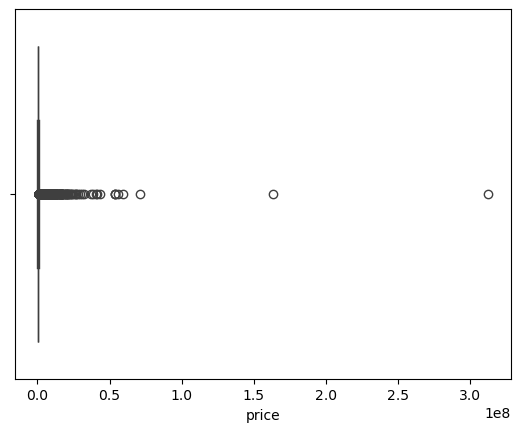

In [31]:
sns.boxplot(df, x="price")
plt.show()

In [41]:
q1,q3 = np.quantile(df["price"], [0.25,0.75])

IQR = q3 - q1

lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)

q1, q3, IQR, lower, upper

(np.float64(185000.0),
 np.float64(424995.0),
 np.float64(239995.0),
 np.float64(-174992.5),
 np.float64(784987.5))

In the histogram below, I remove the upper outliers to give us a better view of the general distribution of the data. As anticipated it is slightly right skewed.

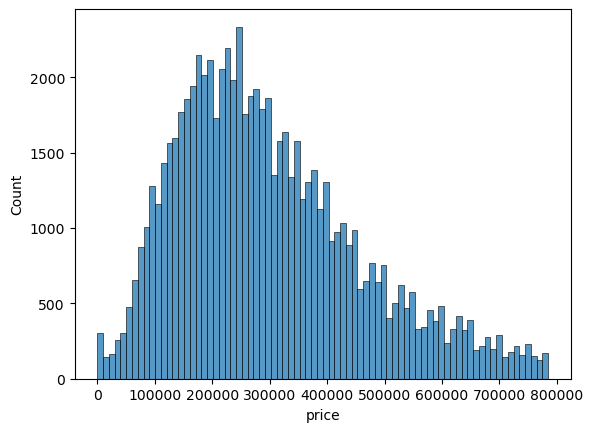

In [42]:
sns.histplot(df[df["price"] < upper], x="price")
plt.show()

### Dates

In [44]:
df["date_of_transfer"].describe()

count                            77791
mean     2024-04-08 08:21:51.329073920
min                1995-01-24 00:00:00
25%                2024-04-12 00:00:00
50%                2024-11-01 00:00:00
75%                2024-11-29 00:00:00
max                2024-12-30 00:00:00
Name: date_of_transfer, dtype: object

**Observations**

I was expecting the dates to fall between 20th November 2024 and 20th December 2024, given the guidance, but we can see that:

- the median value for the data is 1st November 2024
- there is a date from 1995
- the maximum date is 30th December

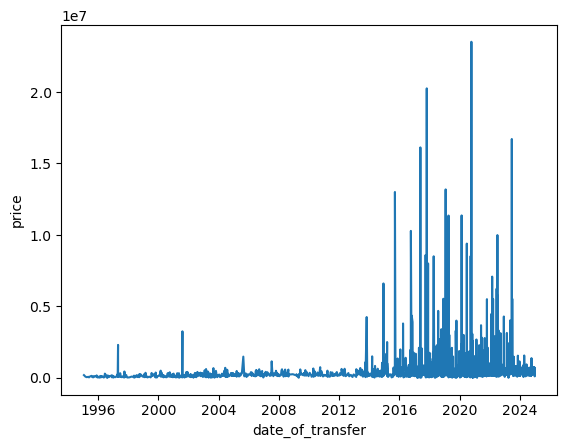

In [47]:
sns.lineplot(df, x="date_of_transfer", y = "price", errorbar=None)
plt.show()

We can also see from this snippet that these do not fall solely into the category of changed records ("C") but included added records ("A") too.

The assumption I made is incorrect. The "A" category can indicate records added or **reclassified** due to new information becoming available during the latest update, which may include both recent and older sales transactions. So it's not unusual to see transactions from many years ago if those records were previously missing or updated in some way.

In [49]:
df[df["date_of_transfer"] < '1995-06-01']

,transaction_uid,price,date_of_transfer,postcode,property_type,is_new_build,tenure_duration,paon,saon,street,locality,town_city,district,county,transaction_type,record_status
3670,{2ACACE8D-5ABB-295E-E063-4804A8C0B0EB},26000,1995-05-26,SA71 4HL,T,N,F,MELBOURNE COTTAGE,NaN,EAST BACK,NaN,PEMBROKE,PEMBROKESHIRE,PEMBROKESHIRE,A,A
3673,{2ACACE8C-CC1E-295E-E063-4804A8C0B0EB},80000,1995-02-28,SS12 9JY,S,N,F,WELLINGTON COTTAGES,4,BURNTMILLS ROAD,NORTH BENFLEET,WICKFORD,BASILDON,ESSEX,A,A
3674,{2ACACE8D-5AB3-295E-E063-4804A8C0B0EB},66000,1995-05-12,SA43 2PJ,D,N,F,PARC GLAS,NaN,NaN,LLECHRYD,CARDIGAN,PEMBROKESHIRE,PEMBROKESHIRE,A,A
3675,{30BDCB63-626C-4ACD-96FF-06D88B266D57},178500,1995-01-27,B96 6PA,D,N,F,WOODLANDS VIEW,NaN,SAMBOURNE LANE,SAMBOURNE,REDDITCH,STRATFORD-ON-AVON,WARWICKSHIRE,A,C
3681,{304708EE-75A9-4078-8B11-722E90530BB8},43500,1995-03-31,SA43 2PJ,D,N,F,THE SMITHY,NaN,NaN,LLECHRYD,CARDIGAN,PEMBROKESHIRE,PEMBROKESHIRE,A,C
3688,{2A289EA0-C243-CDC8-E050-A8C063054829},186500,1995-01-24,BD10 9EF,D,N,F,6,NaN,ALBION CLOSE,NaN,BRADFORD,BRADFORD,WEST YORKSHIRE,A,C
3689,{3ED0C73B-3BD2-4194-A70D-4551780A617B},54000,1995-04-28,PL11 3EL,T,N,F,LINDEN COTTAGE,NaN,NaN,SHEVIOCK,TORPOINT,CORNWALL,CORNWALL,A,C


### Duplicates

Finding duplicates might be  little tricky. What does a duplicate mean in this context?

- **All row information the same**
There are no duplicates in this monthly digest.

- **Duplicate transaction ids**
There are none in this monthly data but looking at the data as a whole I would expect to find some transaction_uids with multiple entries if there have been changes for that transaction.

- **The same property**
Transaction ids reference a published sale. There is no column that provides an easy identifier of a property. In the future, it might be interesting to be able to group data by individual properties to see how the value of that property has changed over the years.

A snippet of these can be found below:

- `AL10 0AL`: possible mistake, all data is the same except the transaction_id. Given that the date of transfer was the same for both records adn the price is the same and both are additions, it seems like this is a duplicate and one could be deleted.
- `AL2 2HT`: In 2020 the price was £620,000. This was recorded as a change and categorised as type "B" transaction. There is another entry for this property in 2023 when the price is £655,000. This is recorded as an addition and categorised as a standard price paid entry ("A"). I would expect there to be an existing record for the 2020 transaction that should be changed.
- `AL2 2QW`: At first this seems confusing: exactly the same property details but with different transaction ids and one recorded as an addition the other as a deletion. The way to handle deletions is to delete the record with the same transaction_uid i.e. there is probably a transaction with `{237B17FD-FC42-22AC-E063-4804A8C0EA3A}` in the historic data that should be deleted. 

**All row information the same**

In [66]:
df[df.duplicated(keep=False)]

,transaction_uid,price,date_of_transfer,postcode,property_type,is_new_build,tenure_duration,paon,saon,street,locality,town_city,district,county,transaction_type,record_status


**Duplicate transaction id**

In [67]:
df[df.duplicated(subset=["transaction_uid"], keep=False)]

,transaction_uid,price,date_of_transfer,postcode,property_type,is_new_build,tenure_duration,paon,saon,street,locality,town_city,district,county,transaction_type,record_status


**The same property**

In [69]:
df[df.duplicated(subset=["postcode", "paon", "saon"], keep=False)].sort_values(by="postcode").head(6)

,transaction_uid,price,date_of_transfer,postcode,property_type,is_new_build,tenure_duration,paon,saon,street,locality,town_city,district,county,transaction_type,record_status
48028,{2ACACE8C-DA2C-295E-E063-4804A8C0B0EB},410000,2024-11-29,AL10 0AL,S,N,F,2,NaN,WARREN CLOSE,NaN,HATFIELD,WELWYN HATFIELD,HERTFORDSHIRE,A,A
48029,{2ACACE8C-DA2D-295E-E063-4804A8C0B0EB},410000,2024-11-29,AL10 0AL,S,N,F,2,NaN,WARREN CLOSE,NaN,HATFIELD,WELWYN HATFIELD,HERTFORDSHIRE,A,A
4089,{A2479555-CFC4-74C7-E053-6B04A8C0887D},620000,2020-03-06,AL2 2HT,S,N,F,2B,NaN,THE MALL,PARK STREET,ST ALBANS,ST ALBANS,HERTFORDSHIRE,B,C
10991,{2ACACE8C-DC4D-295E-E063-4804A8C0B0EB},655000,2023-09-28,AL2 2HT,S,N,F,2B,NaN,THE MALL,PARK STREET,ST ALBANS,ST ALBANS,HERTFORDSHIRE,A,A
51218,{2ACACE8C-DAF0-295E-E063-4804A8C0B0EB},1585000,2024-01-08,AL2 2QW,D,N,F,52,NaN,MAYFLOWER ROAD,PARK STREET,ST ALBANS,ST ALBANS,HERTFORDSHIRE,A,A
77718,{237B17FD-FC42-22AC-E063-4804A8C0EA3A},1585000,2024-01-08,AL2 2QW,D,N,F,52,NaN,MAYFLOWER ROAD,PARK STREET,ST ALBANS,ST ALBANS,HERTFORDSHIRE,A,D


In [57]:
len(df)

77791

## Categorical data

Most of our data is categorical in nature.

There is a unique `transaction_uid` for every row in the dataset.

In [56]:
categorical = ['transaction_uid','postcode',
       'property_type', 'is_new_build', 'tenure_duration', 'paon', 'saon',
       'street', 'locality', 'town_city', 'district', 'county',
       'transaction_type', 'record_status']

df[categorical].nunique()

transaction_uid     77791
postcode            65162
property_type           5
is_new_build            2
tenure_duration         2
paon                10805
saon                 1849
street              41109
locality             7241
town_city            1110
district              318
county                113
transaction_type        2
record_status           3
dtype: int64

### Property type

In [84]:
def get_value_counts(label, mapping, normalize=True):
    df_label_count = df[label].value_counts().to_frame().reset_index()
    df_label_normalize = df[label].value_counts(normalize=True).to_frame().reset_index()
    df_label = df_label_count.merge(df_label_normalize, on=label, how="inner")
    df_label["verbose"] = df_label[label].map(mapping)
    return df_label

In [85]:
p_type_map = {'D': 'Detached', 'S': 'Semi-Detached', 'T':'Terraced', 'F' :'Flats/Maisonettes', 'O' :'Other'}

df_property_type = get_value_counts("property_type", p_type_map)
df_property_type

,property_type,count,proportion,verbose
0,S,20814,0.27,Semi-Detached
1,T,19839,0.26,Terraced
2,D,18220,0.23,Detached
3,F,15142,0.19,Flats/Maisonettes
4,O,3776,0.05,Other


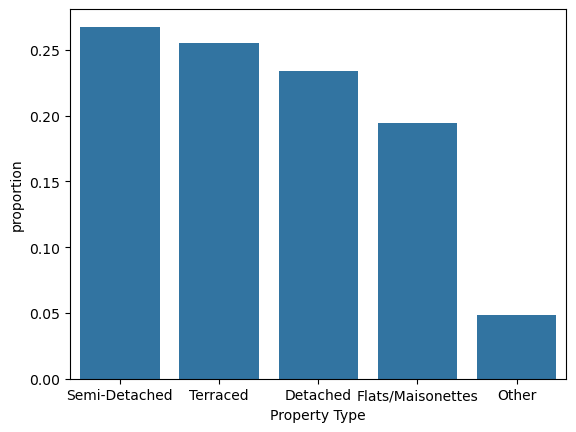

In [87]:
sns.barplot(df_property_type, x="verbose", y="proportion")
plt.xlabel("Property Type")
plt.show()

**Observation**
- there are only 5 types in this category, which confirms the data definition
- Most are semi-detached but they are generally spread quite evenly across the top 4 categories
- Other is the least used category

### Is new build

In [96]:
df["is_new_build"].value_counts(normalize=True)

is_new_build
N   0.86
Y   0.14
Name: proportion, dtype: float64

In [104]:
df["is_new_build_bool"] = (df["is_new_build"] == "Y").astype(int)
df["is_new_build_bool"].value_counts(normalize=True)

is_new_build_bool
0   0.86
1   0.14
Name: proportion, dtype: float64

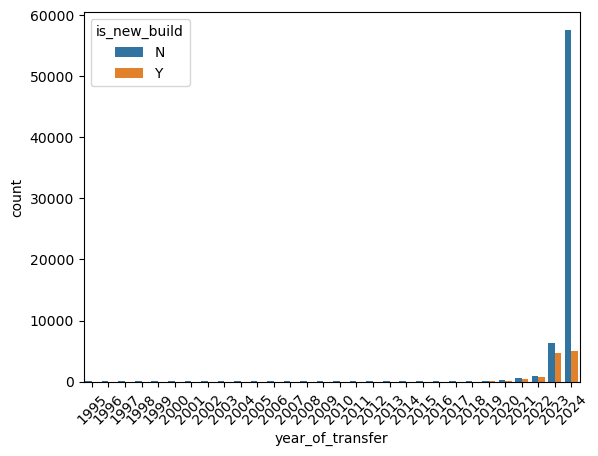

In [95]:
df["year_of_transfer"] = df["date_of_transfer"].dt.year

sns.countplot(df, x="year_of_transfer", hue="is_new_build")
plt.xticks(rotation=45)
plt.show()

In [107]:
df.groupby("year_of_transfer")["is_new_build_bool"].sum()

year_of_transfer
1995       0
1996       1
1997       2
1998       8
1999       4
2000       6
2001       4
2002       4
2003       2
2004      10
2005       7
2006       7
2007       4
2008       2
2009       5
2010       7
2011       4
2012       1
2013       3
2014       3
2015       0
2016       2
2017       5
2018       5
2019      40
2020     124
2021     392
2022     819
2023    4598
2024    4946
Name: is_new_build_bool, dtype: int64

**Observations**

- 86% of our data is related to established properties, not new builds
- Most of the new build data is from the last few years 